In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [72]:
df = pd.read_csv('car_data.csv')
#https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [74]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

<AxesSubplot:>

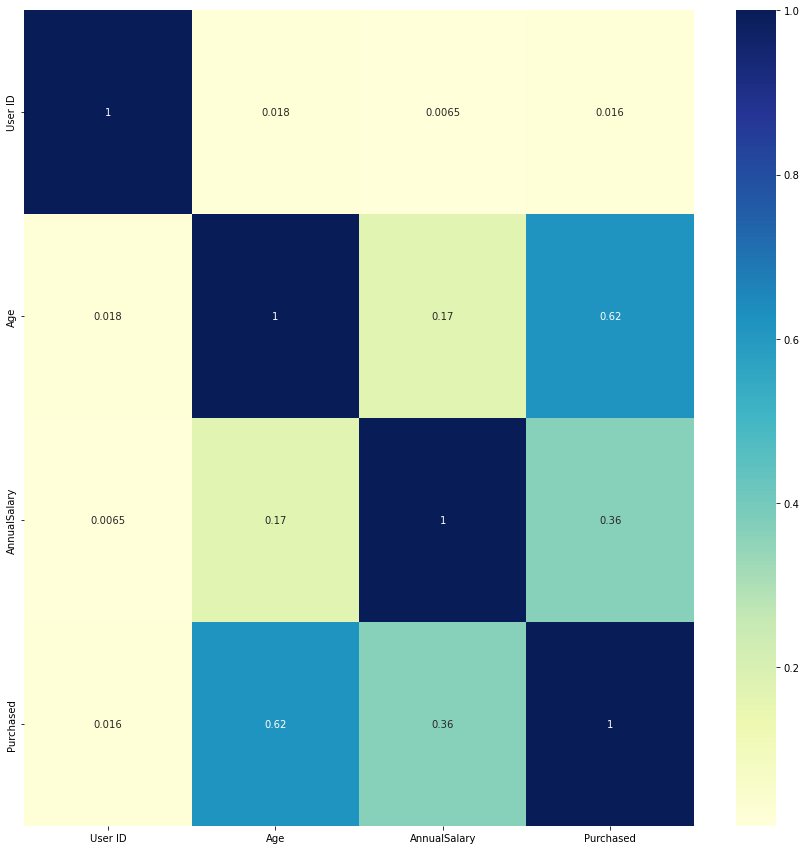

In [75]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

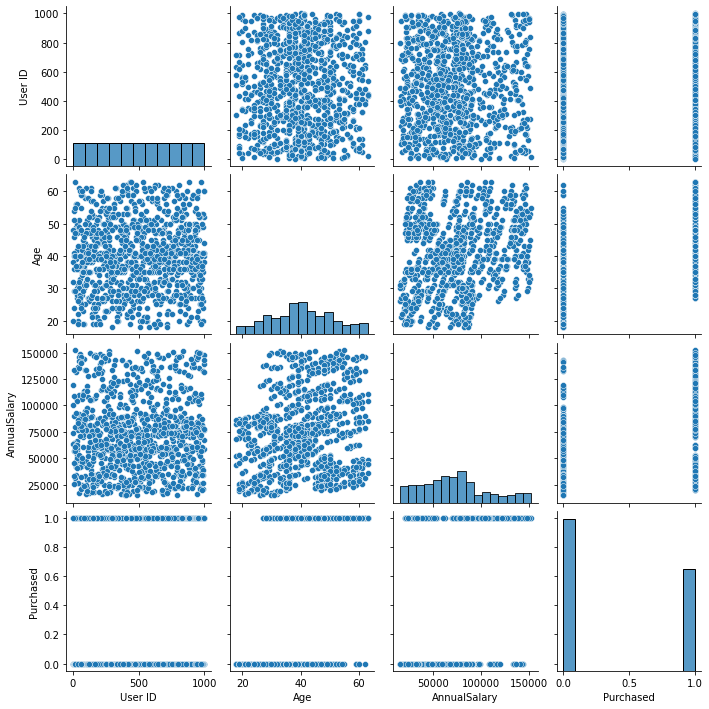

In [26]:
sns.pairplot(df)

In [76]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
x = df.drop('Purchased',axis=1)
y = df['Purchased']
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0
...,...,...,...,...,...
995,863,1,38,59000,0
996,800,0,47,23500,0
997,407,0,28,138500,1
998,299,0,48,134000,1


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [52]:
from sklearn.tree import DecisionTreeClassifier
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train) 

model_dt_2_score_tarin = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Training Score',model_dt_2_score_tarin)

print('Testing Score',model_dt_2_score_test)

Training Score 0.9025
Testing Score 0.895


In [53]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(x_train,y_train)

model_dt_4_score_tarin = model_dt_4.score(x_train,y_train)

model_dt_4_score_test = model_dt_4.score(x_test,y_test)

print('Training Score',model_dt_4_score_tarin)

print('Testing Score',model_dt_4_score_test)

Training Score 0.91625
Testing Score 0.89


In [54]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(x_train,y_train)

model_dt_6_score_tarin = model_dt_6.score(x_train,y_train)

model_dt_6_score_test = model_dt_6.score(x_test,y_test)

print('Training Score',model_dt_6_score_tarin)

print('Testing Score',model_dt_6_score_test)

Training Score 0.94
Testing Score 0.895


In [55]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(x_train,y_train)

model_dt_8_score_tarin = model_dt_8.score(x_train,y_train)

model_dt_8_score_test = model_dt_8.score(x_test,y_test)

print('Training Score',model_dt_8_score_tarin)

print('Testing Score',model_dt_8_score_test)

Training Score 0.96875
Testing Score 0.895


In [56]:
dt = DecisionTreeClassifier(max_depth=4,criterion='entropy')

dt.fit(x_train,y_train)

y_pred_dt = dt.predict_proba(x_test)[:,1]
# y_pred_dt

dt_score_train = dt.score(x_train,y_train)
print(dt_score_train)

dt_score_test = dt.score(x_test,y_test)
print(dt_score_test)

0.915
0.9


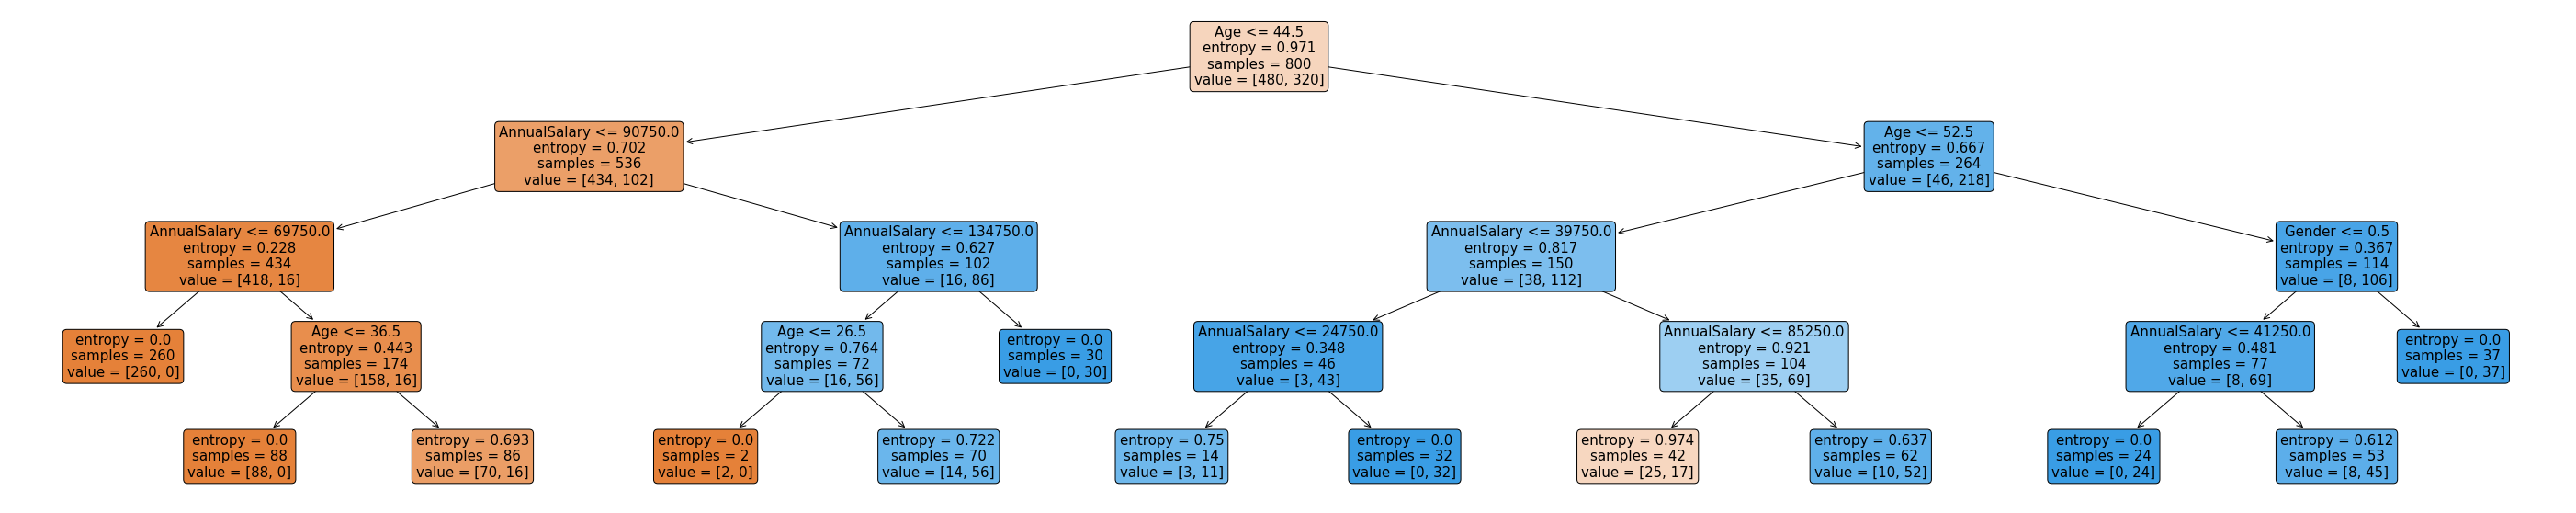

In [58]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dt,filled=True,fontsize=15,rounded=True,feature_names=x.columns)
plt.show()

In [59]:
y_pred = dt.predict(x_test)

In [60]:
df_compare = pd.DataFrame({'Actual' : y_test, 'Prediction': y_pred})
df_compare


,Actual,Prediction
36,0,0
242,1,1
536,1,0
66,0,0
161,1,1
...,...,...
312,1,1
604,0,0
260,0,0
920,0,0


In [61]:
from sklearn.metrics import confusion_matrix,classification_report,recall_score,roc_curve,precision_score,roc_auc_score
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[114,   4],
       [ 16,  66]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

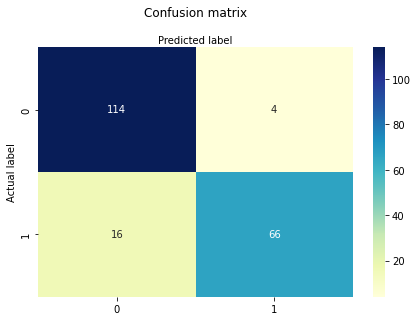

In [62]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       118
           1       0.94      0.80      0.87        82

    accuracy                           0.90       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



In [68]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

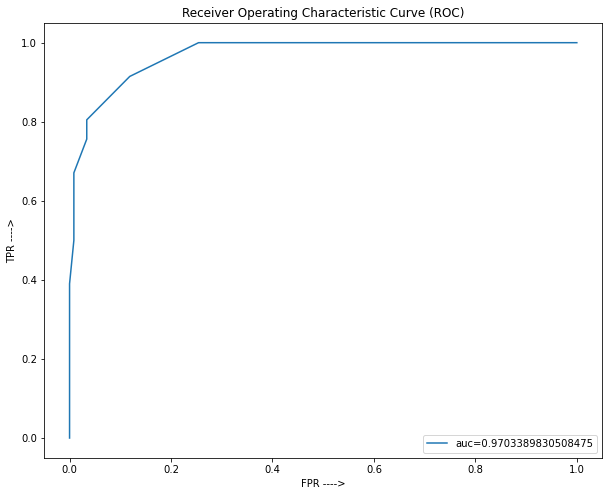

In [64]:
# ROC and AUC
from sklearn import metrics
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()